<a href="https://colab.research.google.com/github/jmarcoscosta/MachineLearning-IMD/blob/master/Global_poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addressing global poverty by solving economical inequalities

- UN development goal: Goal 1 - End poverty in all its forms everywhere
- Target 1.1: By 2030, eradicate extreme poverty for all people everywhere, currently measured as people living on less than $1.25 a day
- Indicator 1.1.1: Proportion of population below the international poverty line, by sex, age, employment status and geographical location (urban/rural)

Therefore, the reference used in the available data is actually \$1.90 instead of \$1.25.


In [1]:
# Libraries
from scipy.stats.stats import pearsonr
from scipy import stats
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
drive.mount('/content/drive')

Mounted at /content/drive


### Poverty Dataset

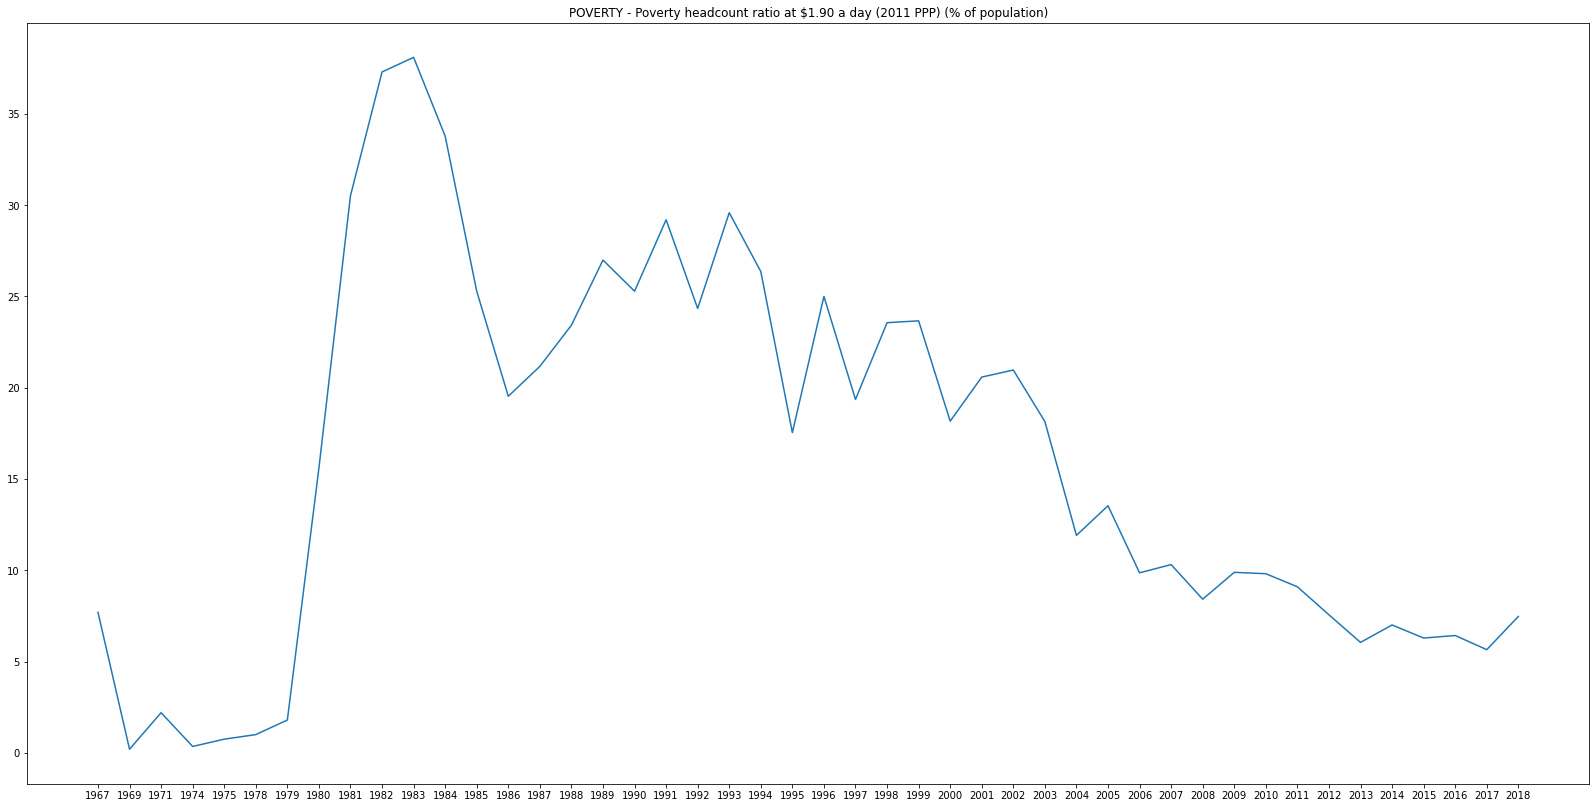

In [15]:
poverty = pd.read_csv("/content/drive/My Drive/ML-IMD/Poverty.csv", skiprows=4)

poverty = poverty.loc[poverty['Indicator Name'] == 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)']
poverty = poverty.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

poverty = poverty.mean()
poverty = poverty.dropna()

# Removing outliers
poverty = poverty[np.abs(stats.zscore(poverty)) < 3]

# Plot
plt.figure(figsize=(28, 14))
plt.plot(poverty)
plt.title("POVERTY - Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)")
plt.show()

### Inequality dataset

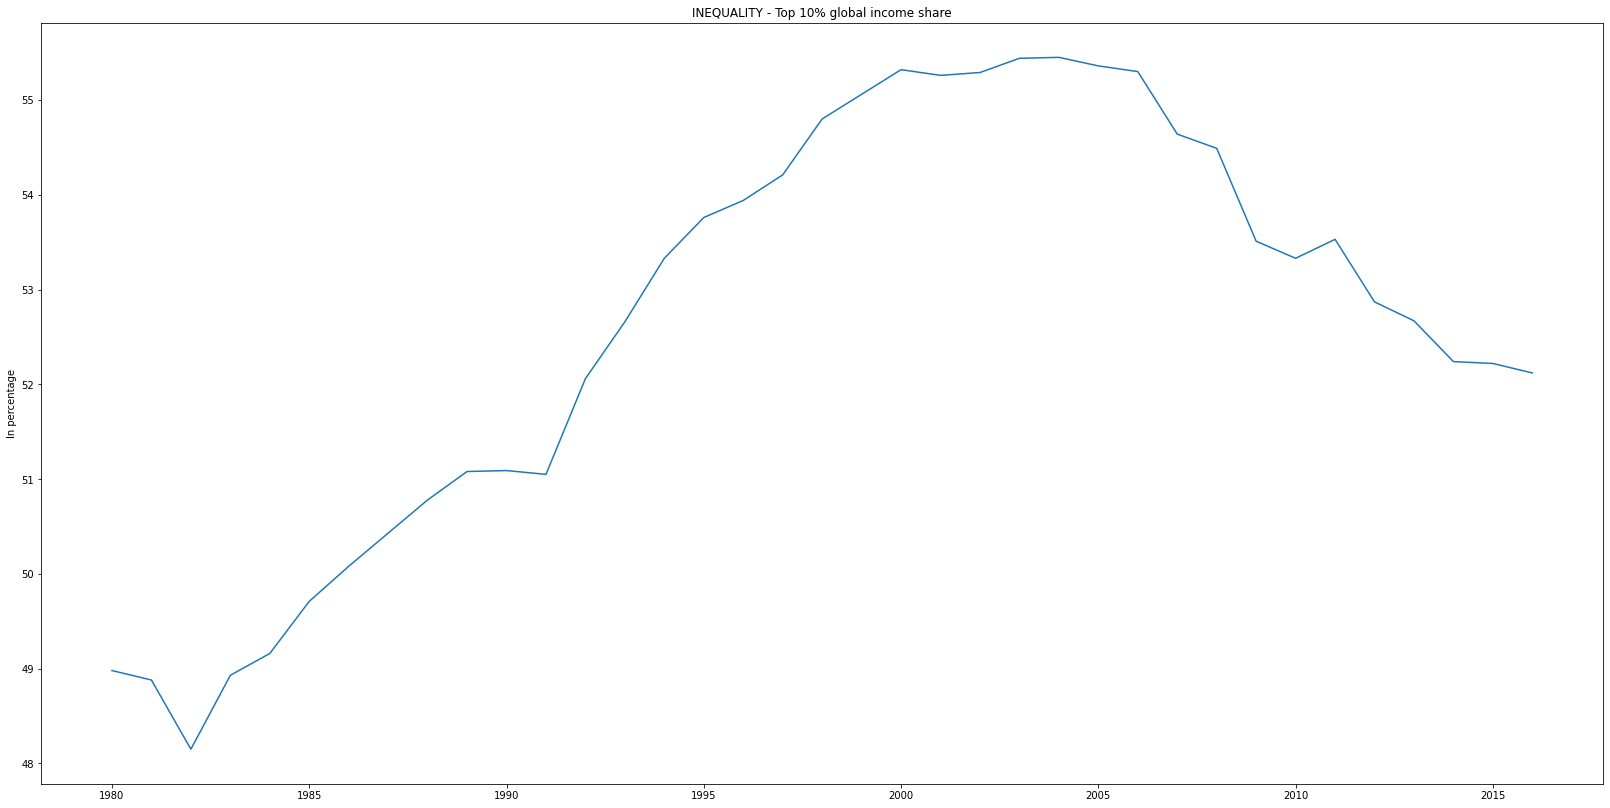

In [7]:
inequality = pd.read_csv("/content/drive/My Drive/ML-IMD/Inequality.csv")

inequality = inequality.dropna()

# Plot
x = inequality["Year"]
y = inequality["Share"]*100
plt.figure(figsize=(28, 14))
plt.title("INEQUALITY - Top 10% global income share")
plt.ylabel("In percentage")
plt.plot(x, y)
plt.show()

- adicionar plot com as duas linhas juntas

### Predictions on poverty

- What will be poverty status in 2030?

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


lr = LinearRegression()

start_from = 7

x = np.array(poverty.index).astype('float').reshape(-1, 1)
x = x[start_from:]
y = poverty.to_numpy()
y = y[start_from:]

# using linear regression
model = lr.fit(x, y)
R2 = lr.score(x, y)
print("Linear performance: " + str(R2))

# using polynomial regression
x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
model = lr.fit(x_, y)
R2 = lr.score(x_, y)
print("Polynomial performance: " + str(R2))


Linear performance: 0.7575627133745977
Polynomial performance: 0.7945342912871781


Following this simple analysis, we will use a polynomial model of degree 3 to represent the poverty.

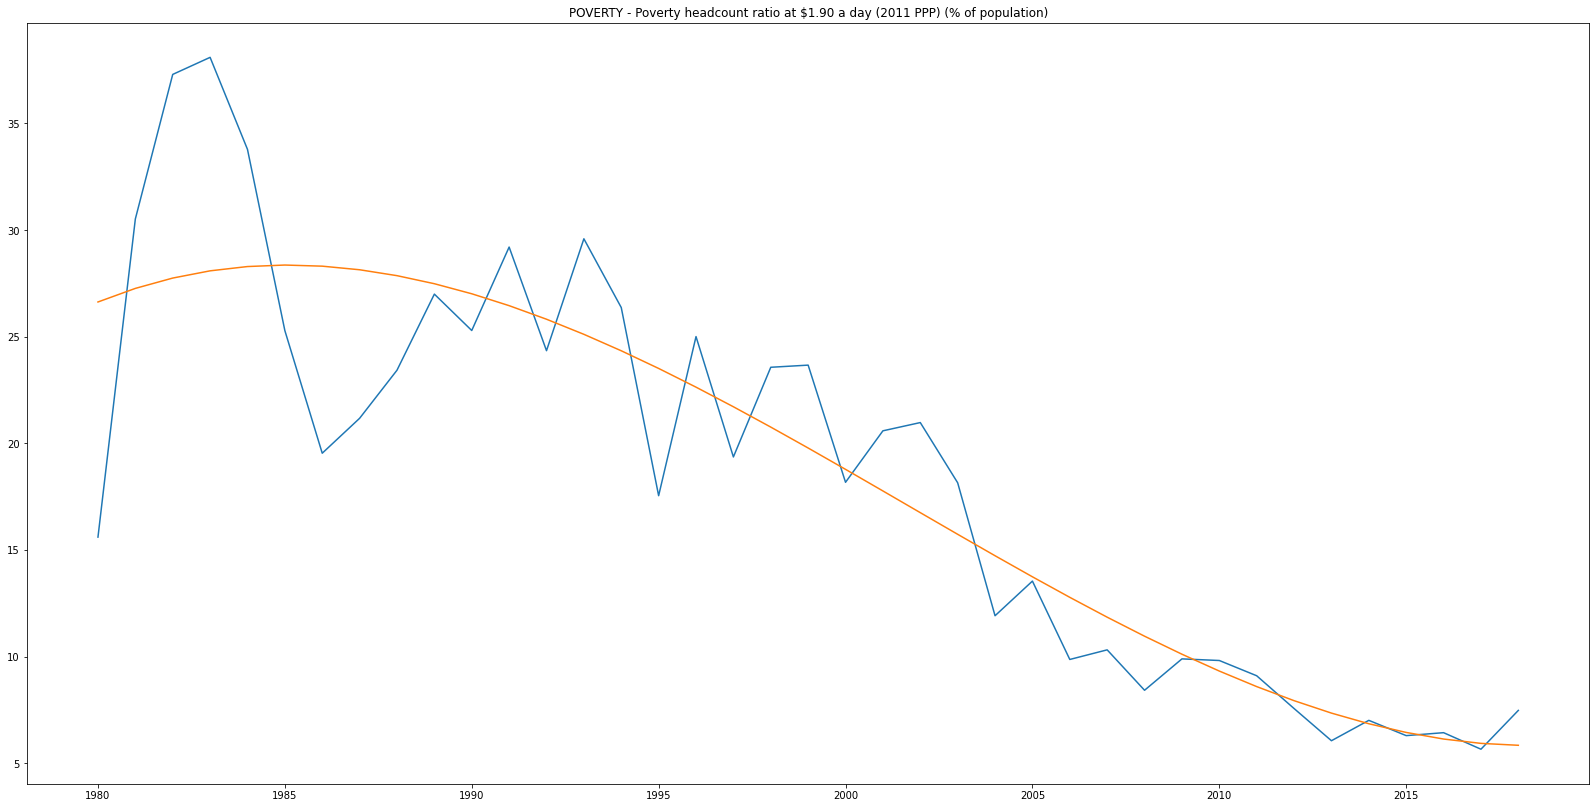

In [112]:
plt.figure(figsize=(28, 14))
plt.plot(x, y)
plt.plot(x_[0:, 0], lr.predict(x_))
plt.title("POVERTY - Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)")
plt.show()

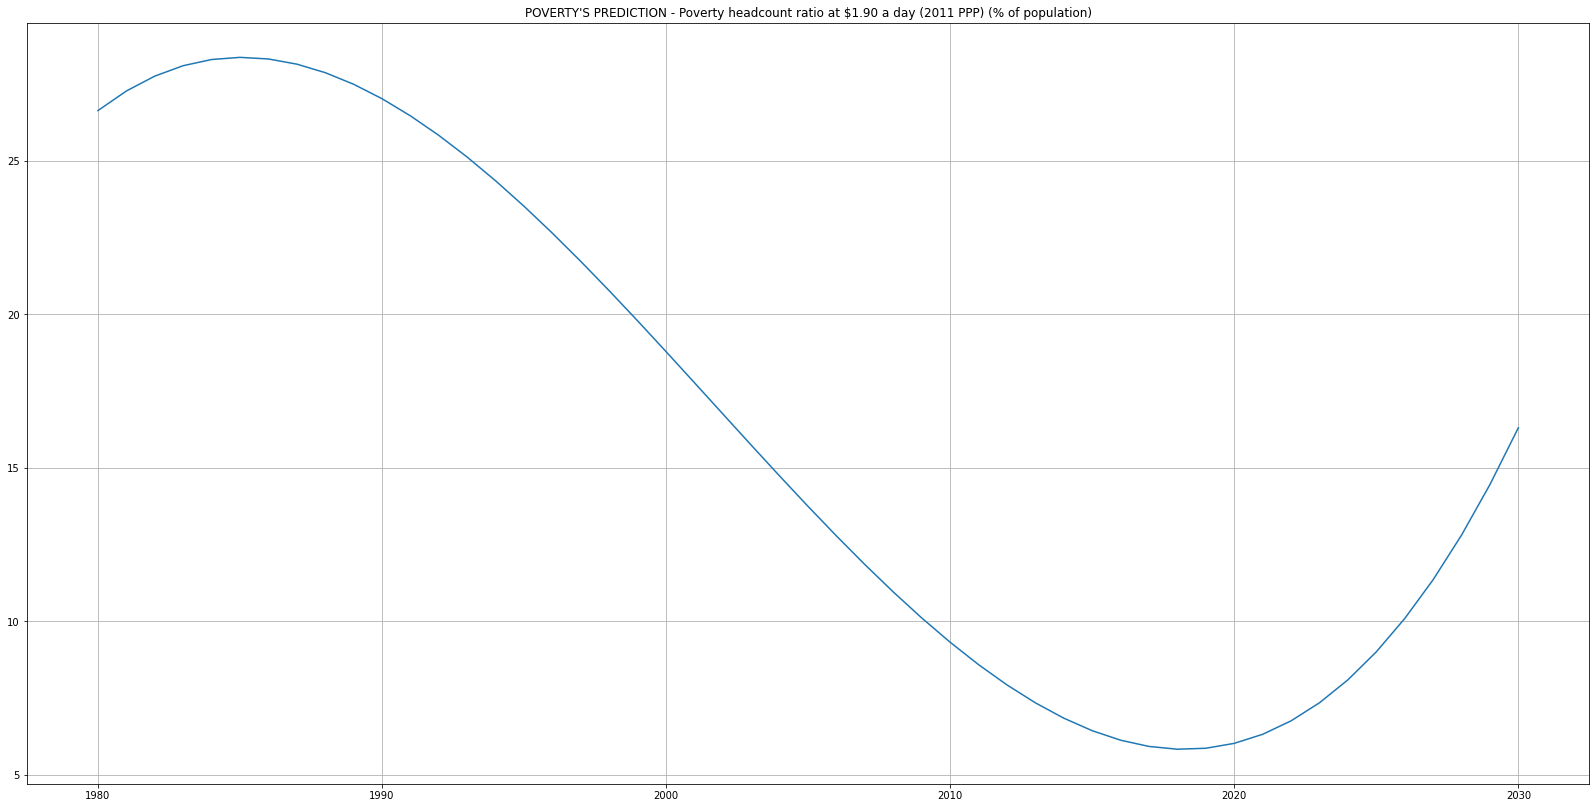

In [123]:
px = np.array(np.arange(1980, 2031)).reshape(-1, 1)
px_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(px)
plt.figure(figsize=(28, 14))
pred = lr.predict(px_)
plt.plot(px_[0:, 0], pred)
plt.title("POVERTY'S PREDICTION - Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)")
plt.grid()
plt.show()


Conclusion: poverty is far from zero in 2030.

### Estimating with regression

- Using Inequality as a feature and Poverty as the target
- Goal: calculate what should be the inequality level so that poverty is around zero by 2030

Both Inequality and Povery data are time series with different limits, so we will choose an interception: we will crop both data to go from 1980 to 2016.


a = -75.94640415233306
b = 1.581533070893069
c = 0
Performance:
R-Squared: 0.7524169234824247


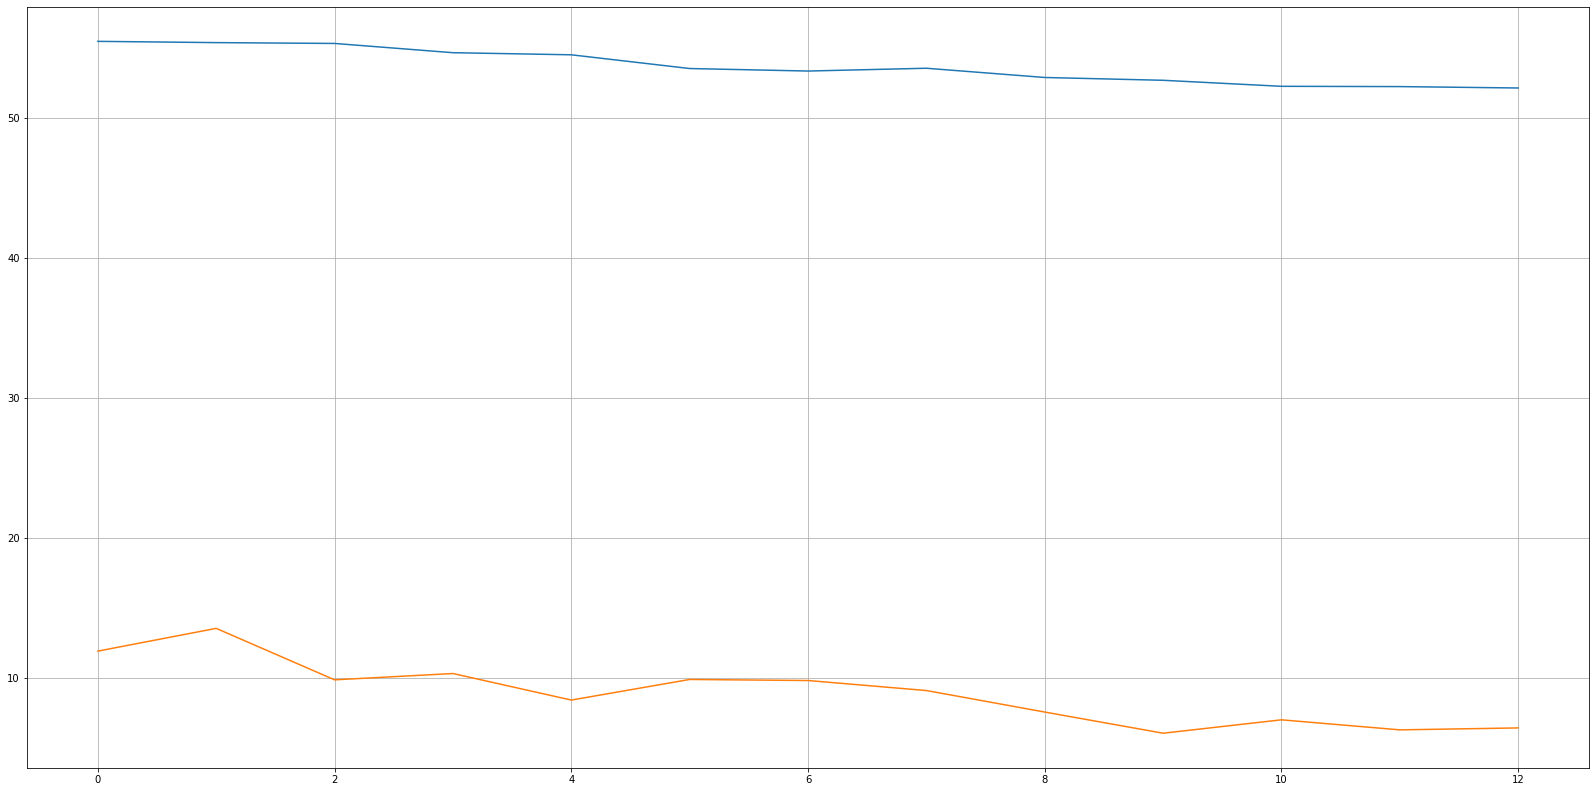

[48.02074996]


In [190]:
feature = inequality["Share"]*100
feature = feature.to_numpy().reshape(-1, 1)
target = poverty.to_numpy()

# crop target data to match feature
N = 24
feature = feature[N:]
target = target[N + start_from:target.size - 2]

#feature_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(feature)
model = lr.fit(feature, target)
#model = lr.fit(feature_, target)

a = model.intercept_
#b, c = model.coef_[0], model.coef_[1]
b, c = model.coef_[0], 0

print("a = " + str(a))
print("b = " + str(b))
print("c = " + str(c))
#R2 = model.score(feature_, target)
R2 = model.score(feature, target)
print("Performance:")
print("R-Squared: " + str(R2))
  
# plot the results
plt.figure(figsize=(28, 14))
#plt.scatter(feature, target, marker = 'o')
plt.plot(feature)
plt.plot(target)
#plt.scatter(feature_[0:, 0], lr.predict(feature_), color = 'r')
#plt.scatter(feature, lr.predict(feature), color = 'r')
plt.grid()
plt.show()

print(np.roots([c, b, a]))

Finally, the ideal value of inequality under which poverty would be reduced to close to zero would, according to our calculations, be 48\%.

### How to reach such inequality level?

- Achieving full employment by a combined action of the private market and the government
- Adjusting the value of the minimum wage
- Ensure that workers with disabilities have a fair shot at employment and economic security
- Close tax loopholes that benefit the wealthy and special interests and raise taxes on capital income
- Protect and strengthen investments in basic living standards such as nutrition, health, and income insurance

Source: https://talkpoverty.org/2015/06/10/solutions-economic-inequality/